# Reducing MNIST dataset down to two dimensions and plotting the results

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [4]:
# For this practice exercise, we will use only a small subset of the MNIST dataset

X_train = X_train[:5000]
y_train = y_train[:5000]

In [5]:
tsne = TSNE(n_components=2, random_state=42, init= 'random', learning_rate='auto')
X_2d = tsne.fit_transform(X_train)

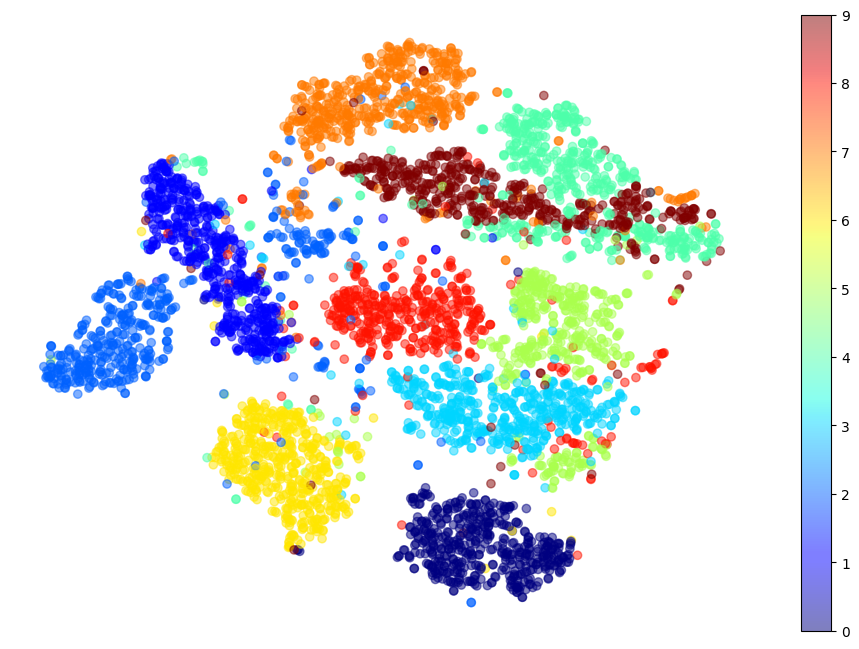

In [6]:
plt.figure(figsize=(12, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1],
            c=y_train.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

In [7]:
def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)

    neighbors = np.array([[10., 10.]])

    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

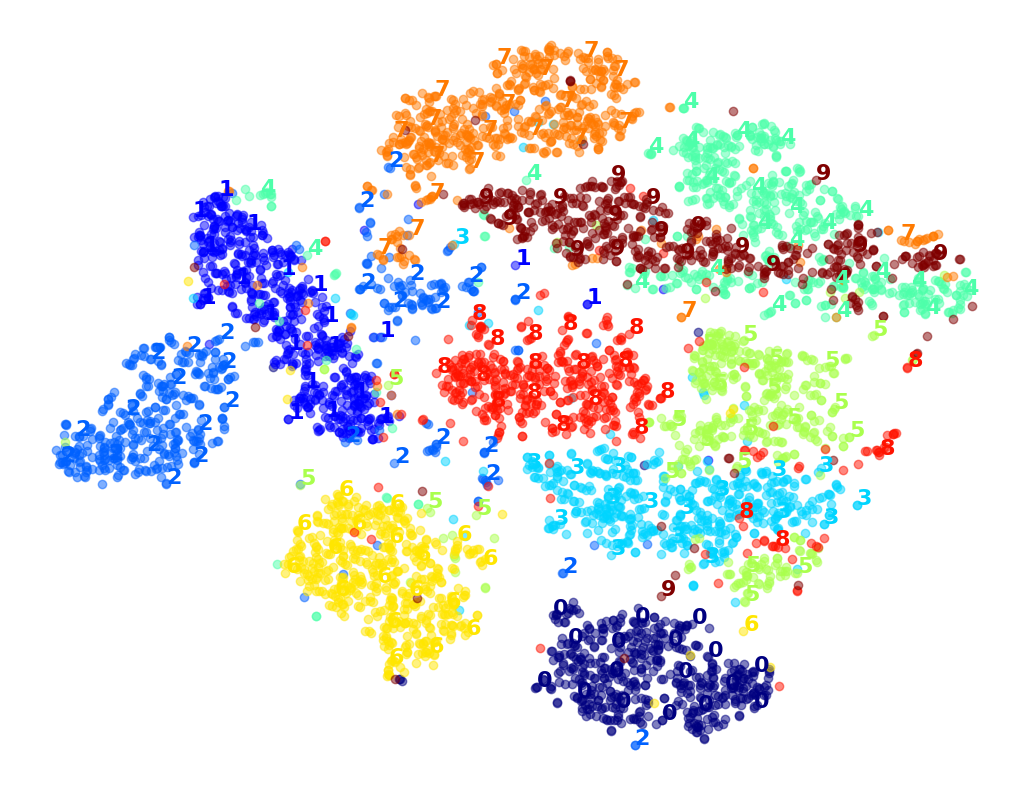

In [8]:
plot_digits(X_2d, y_train)

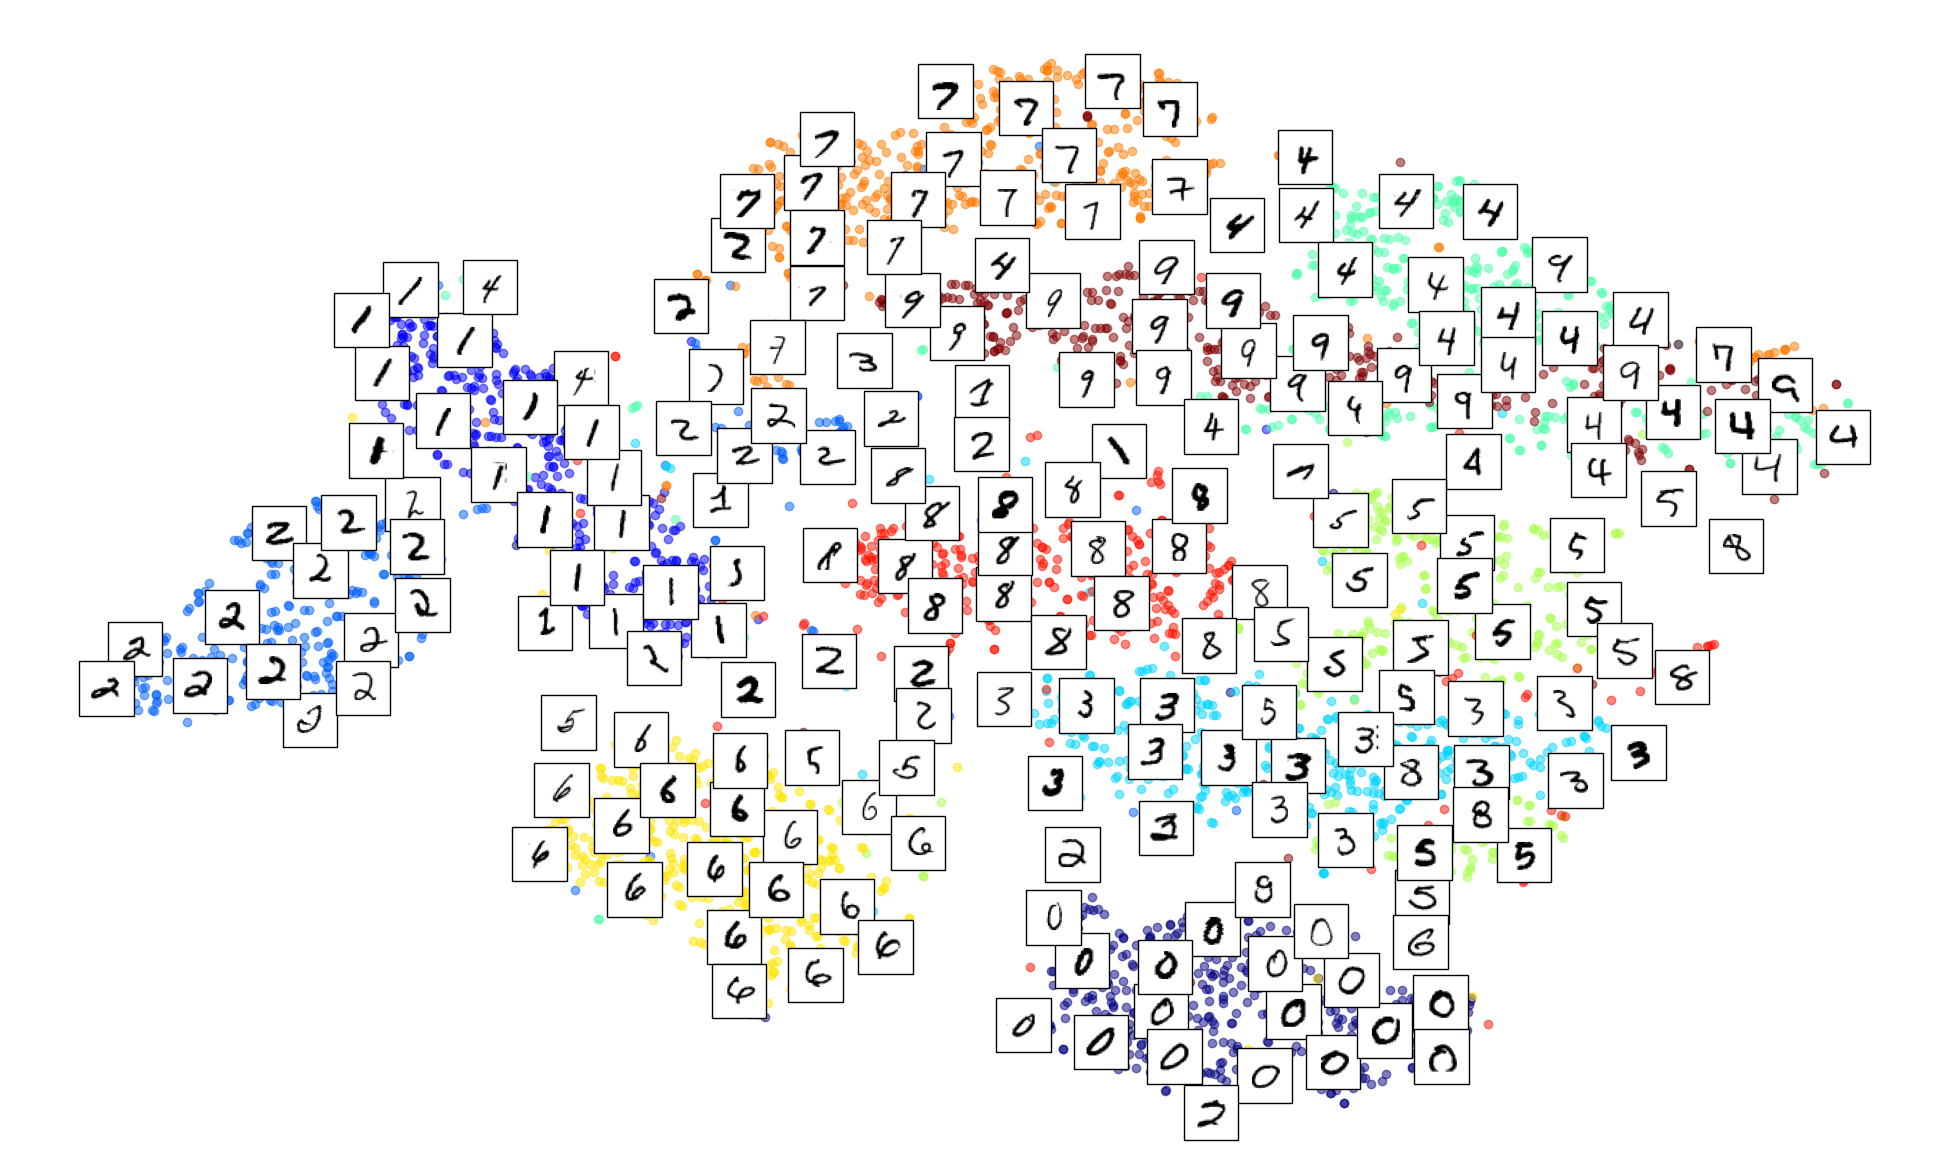

In [10]:
plot_digits(X_2d, y_train, images=X_train, figsize=(25, 15))